<a href="https://colab.research.google.com/github/wangqy1216/Thesis/blob/master/SVM/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip drive/My\ Drive/KDEF.zip -d .

In [2]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2020-09-21 02:32:10--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  90%[=================>  ]  55.08M   323KB/s    in 2m 44s  

2020-09-21 02:34:54 (344 KB/s) - Connection closed at byte 57751720. Retrying.

--2020-09-21 02:34:55--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 6288377 (6.0M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[++++++++++++++++++=>]  61.07M  1.29MB/s    in 7.5s    

2020-09-21 02:35:03 (824 KB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/6404009

In [3]:
from skimage import io
from skimage import util
import cv2
from imutils import face_utils
import dlib
from google.colab.patches import cv2_imshow
import os
import glob
from skimage.transform import rescale, resize, downscale_local_mean

Test

In [4]:
image = io.imread('KDEF/AF01/AF01AFS.JPG')

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
  
  if shape[0][0] != 0:
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0) , 2)
    # show the face number
    cv2.putText(gray, "Face #{}".format(i + 1), (x - 10, y - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0) , 2)
    for (x, y) in shape:
      cv2.circle(gray, (x, y), 2, (0, 0, 255) , 2)

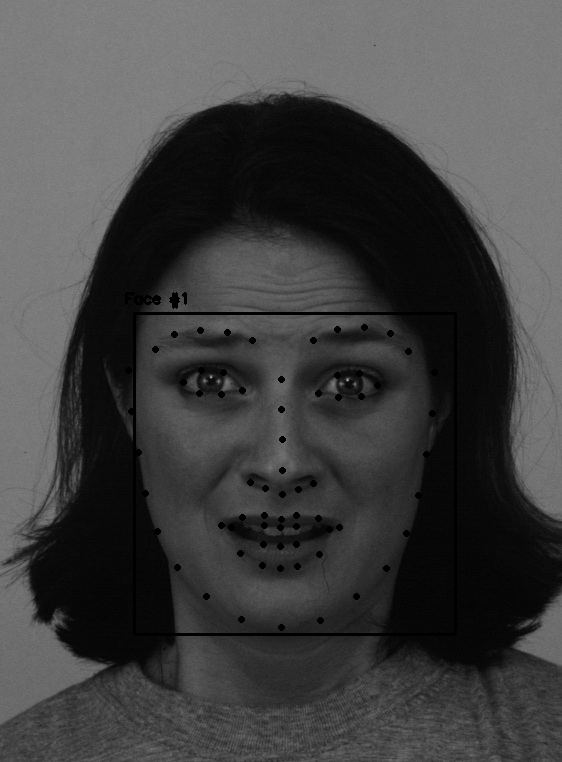

In [5]:
cv2_imshow(gray)

Go through subdirectories and real all images

In [6]:
data = []
labels = []

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
      
for path, subdirs, files in os.walk('KDEF'):
    for name in files:
        img_path = os.path.join(path, name)

        if (img_path.find('.JPG') != -1):
          image = io.imread(img_path)
          image = resize(image, (256, 256))
          image = util.img_as_ubyte(image)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

          # detect faces in the grayscale image
          rects = detector(gray, 1)

          if len(rects) != 0:
            shape = predictor(gray, rects[0])
            shape = face_utils.shape_to_np(shape)

            if shape[0][0] != 0:
              data.append(shape)
              labels.append(img_path[14:16])

In [8]:
print(len(data))
print(len(labels))

2919
2919


Feature Extraction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier 

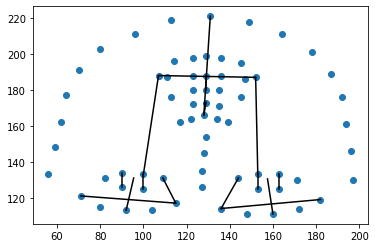

In [16]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

x = []
y = []

for i, j in data[3]:
  x.append(i)
  y.append(j)

plt.scatter(x, y)

line = lines.Line2D([data[3][22][0],data[3][26][0]],[data[3][22][1],data[3][26][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][17][0],data[3][21][0]],[data[3][17][1],data[3][21][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][24][0],(data[3][42][0] + data[3][45][0]) / 2],[data[3][24][1], (data[3][42][1] + data[3][45][1]) / 2],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][19][0],(data[3][36][0] + data[3][39][0]) / 2],[data[3][19][1], (data[3][36][1] + data[3][39][1]) / 2],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][22][0],data[3][42][0]],[data[3][22][1],data[3][42][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][21][0],data[3][39][0]],[data[3][21][1],data[3][39][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][43][0],data[3][47][0]],[data[3][43][1],data[3][47][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][44][0],data[3][46][0]],[data[3][44][1],data[3][46][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][38][0],data[3][40][0]],[data[3][38][1],data[3][40][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][37][0],data[3][41][0]],[data[3][37][1],data[3][41][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][62][0],data[3][66][0]],[data[3][62][1],data[3][66][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][48][0],data[3][54][0]],[data[3][48][1],data[3][54][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][47][0],data[3][54][0]],[data[3][47][1],data[3][54][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][48][0],data[3][40][0]],[data[3][48][1],data[3][40][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][51][0],data[3][33][0]],[data[3][51][1],data[3][33][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[3][8][0],data[3][33][0]],[data[3][8][1],data[3][33][1]],linestyle='-',color='k')
plt.axes().add_line(line)

In [17]:
import math

def feature_extractor(data):

  # horizental_norm_distance = math.sqrt( ((data[0][0] - data[16][0])**2) + ((data[0][1] - data[16][1])**2) )
  # vertical_norm_distance = math.sqrt( ((data[27][0] - data[8][0])**2) + ((data[27][1] - data[8][1])**2) )

  #Left eye center
  left_eye_center_x = (data[36][0] + data[39][0]) / 2
  left_eye_center_y = (data[36][1] + data[39][1]) / 2

  #Right eye center
  right_eye_center_x = (data[41][0] + data[45][0]) / 2
  right_eye_center_y = (data[41][1] + data[45][1]) / 2

  #Eye Center
  eyebrow_center_x = (left_eye_center_x + right_eye_center_x) / 2
  eyebrow_center_y = (left_eye_center_y + right_eye_center_y) / 2

  horizental_norm_distance = math.sqrt( ((left_eye_center_x - right_eye_center_x)**2) + ((left_eye_center_y - right_eye_center_y)**2) )
  vertical_norm_distance = math.sqrt( ((eyebrow_center_x - data[33][0])**2) + ((eyebrow_center_y - data[33][1])**2) )



  #Left Eyebrow Length
  left_eyebrow_length = math.sqrt( ((data[22][0] - data[26][0])**2) + ((data[22][1] - data[26][1])**2) )
  #Right Eyebrow Length
  right_eyebrow_length = math.sqrt( ((data[17][0] - data[21][0])**2) + ((data[17][1] - data[21][1])**2) )

  #Left Outer Eyebrow Height
  left_outer_eyebrow_height = math.sqrt( ((data[24][0] - (data[42][0] + data[45][0]) / 2)**2) + ((data[24][1] - (data[42][1] + data[45][1]) / 2)**2) )
  #Right Outer Eyebrow Height
  right_outer_eyebrow_height = math.sqrt( ((data[19][0] - (data[36][0] + data[39][0]) / 2)**2) + ((data[19][1] - (data[36][1] + data[39][1]) / 2)**2) )

  #Left Inner Eyebrow Height
  left_inner_eyebrow_height = math.sqrt( ((data[22][0] - data[42][0])**2) + ((data[22][1] - data[42][1])**2) )
  #Right Inner Eyebrow Height
  right_inner_eyebrow_height = math.sqrt( ((data[21][0] - data[39][0])**2) + ((data[21][1] - data[39][1])**2) )

  #Left Eye Height
  left_eye_height = math.sqrt( ((data[43][0] - data[47][0])**2) + ((data[43][1] - data[47][1])**2) ) + math.sqrt( ((data[44][0] - data[46][0])**2) + ((data[44][1] - data[46][1])**2) )
  #Right Eye Height
  right_eye_height = math.sqrt( ((data[38][0] - data[40][0])**2) + ((data[38][1] - data[40][1])**2) ) + math.sqrt( ((data[37][0] - data[41][0])**2) + ((data[37][1] - data[41][1])**2) )

  #Mouth Height
  mouth_height = math.sqrt( ((data[62][0] - data[66][0])**2) + ((data[62][1] - data[66][1])**2) )

  #Mouth Width
  mouth_width = math.sqrt( ((data[48][0] - data[54][0])**2) + ((data[48][1] - data[54][1])**2) )

  #Left Lip Height
  left_lip_height = math.sqrt( ((data[47][0] - data[54][0])**2) + ((data[47][1] - data[54][1])**2) )

  #Right Lip Height
  right_lip_height = math.sqrt( ((data[48][0] - data[40][0])**2) + ((data[48][1] - data[40][1])**2) )

  #Upper Lip Height
  upper_lip_height = math.sqrt( ((data[51][0] - data[33][0])**2) + ((data[51][1] - data[33][1])**2) )

  #Jaw Height
  jaw_height = math.sqrt( ((data[8][0] - data[33][0])**2) + ((data[8][1] - data[33][1])**2) )

  return [
          left_eyebrow_length / horizental_norm_distance, 
          right_eyebrow_length / horizental_norm_distance, 
          left_outer_eyebrow_height / vertical_norm_distance, 
          right_outer_eyebrow_height / vertical_norm_distance, 
          left_inner_eyebrow_height / vertical_norm_distance, 
          right_inner_eyebrow_height / vertical_norm_distance, 
          left_eye_height / vertical_norm_distance, 
          right_eye_height / vertical_norm_distance, 
          mouth_height / vertical_norm_distance, 
          mouth_width / horizental_norm_distance, 
          left_lip_height / vertical_norm_distance, 
          right_lip_height / vertical_norm_distance, 
          upper_lip_height / vertical_norm_distance, 
          jaw_height / vertical_norm_distance
          ]

  # return [
  #         left_eyebrow_length,
  #         right_eyebrow_length,
  #         left_outer_eyebrow_height, 
  #         right_outer_eyebrow_height, 
  #         left_inner_eyebrow_height, 
  #         right_inner_eyebrow_height, 
  #         left_eye_height, 
  #         right_eye_height, 
  #         mouth_height, 
  #         mouth_width, 
  #         left_lip_height, 
  #         right_lip_height, 
  #         upper_lip_height, 
  #         jaw_height
  #         ]

In [18]:
def label_to_num(label):
  if label == 'AF':
    return 0
  if label == 'AN':
    return 1
  if label == 'DI':
    return 2
  if label == 'HA':
    return 3
  if label == 'NE':
    return 4
  if label == 'SA':
    return 5
  if label == 'SU':
    return 6
  else:
    return 7

In [19]:
features = []
emotions = []

for i in range(len(data)):
  if label_to_num(labels[i]) != 7:
    emotions.append(label_to_num(labels[i]))
    features.append(feature_extractor(data[i]))

In [20]:
len(features)

2917

In [23]:
train_features = features[0:2699]
train_emotions = emotions[0:2699]

test_features = features[2700:2916]
test_emotions = emotions[2700:2916]

In [24]:
print(len(train_features))
print(len(test_features))
print(len(features[0]))
print(len(emotions))

2699
216
14
2917


SVM

In [25]:
import numpy as np
from sklearn.svm import SVC
clf = SVC(C= 5.0, kernel='poly', gamma='scale', decision_function_shape='ovr')
clf.fit(train_features, train_emotions) 

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
output = clf.predict(test_features)
counter = 0

for i in range(len(output)):
  if output[i] == test_emotions[i]:
    counter += 1

In [27]:
counter

160

In [28]:
160 / 216

0.7407407407407407

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_emotions, output)) 

              precision    recall  f1-score   support

           0       0.76      0.61      0.68        31
           1       0.54      0.70      0.61        30
           2       0.70      0.70      0.70        33
           3       0.86      1.00      0.92        30
           4       0.83      0.61      0.70        31
           5       0.83      0.65      0.73        31
           6       0.76      0.93      0.84        30

    accuracy                           0.74       216
   macro avg       0.75      0.74      0.74       216
weighted avg       0.75      0.74      0.74       216



DNN

In [107]:
import tensorflow as tf

def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a one-dimensional 14*1 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(14,)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(0.3))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(0.3))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.3))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=7, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    

In [106]:
learning_rate = 0.001
epochs = 100
batch_size = 128
validation_split = 0.1

In [89]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0002),
                loss="categorical_crossentropy",
                metrics=['accuracy'])

In [98]:
model = create_model(learning_rate)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 14)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               3840      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)             

In [109]:
import pandas as pd

In [108]:
def train_model(model, train_features, train_labels, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_labels, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

In [37]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [233]:
model(np.expand_dims(test_features[0], axis=0))

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[0.14120093, 0.11963367, 0.1554341 , 0.15098278, 0.15743813,
        0.14234048, 0.13296987]], dtype=float32)>

In [234]:
test_emotions[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [110]:
def split_dataset(features, emotions):
  size = len(features)

  idx_range = np.arange(0, size)
  np.random.shuffle(idx_range)

  train_features = []
  train_labels = []

  test_features = []
  test_labels = []

  for i in range(idx_range.size):
    if i < 9/10 * len(idx_range):
      train_features.append(features[i])
      arr = np.zeros(7)
      arr[emotions[i]] = 1
      train_labels.append(arr)
    else:
      test_features.append(features[i])
      arr = np.zeros(7)
      arr[emotions[i]] = 1
      test_labels.append(arr)

  return np.array(train_features), np.array(train_labels), np.array(test_features), np.array(test_labels)

In [111]:
for i in range(10):
  train_features, train_emotions, test_features, test_emotions = split_dataset(features, emotions)
  model = create_model(learning_rate)
  train_model(model, train_features, train_emotions, epochs = 150)

  prediction = model.predict(test_features)

  predictions = []

  for i in range(len(prediction)):
    predictions.append(np.argmax(prediction[i]))

  groundtruth = []
  for i in range(len(train_emotions)):
    for j in range(len(train_emotions[i])):
      if train_emotions[i][j] == 1:
        groundtruth.append(j)

  print(classification_report(groundtruth, predictions))

Epoch 1/150
74/74 [==============================] - 0s 4ms/step - loss: 1.8243 - accuracy: 0.2598 - val_loss: 1.4886 - val_accuracy: 0.3954
Epoch 2/150
74/74 [==============================] - 0s 3ms/step - loss: 1.4063 - accuracy: 0.4249 - val_loss: 1.2989 - val_accuracy: 0.5095
Epoch 3/150
74/74 [==============================] - 0s 3ms/step - loss: 1.2971 - accuracy: 0.4757 - val_loss: 1.2085 - val_accuracy: 0.5665
Epoch 4/150
74/74 [==============================] - 0s 3ms/step - loss: 1.2215 - accuracy: 0.4985 - val_loss: 1.1333 - val_accuracy: 0.5513
Epoch 5/150
74/74 [==============================] - 0s 3ms/step - loss: 1.1786 - accuracy: 0.5290 - val_loss: 1.1064 - val_accuracy: 0.6008
Epoch 6/150
74/74 [==============================] - 0s 3ms/step - loss: 1.1573 - accuracy: 0.5387 - val_loss: 1.0578 - val_accuracy: 0.5627
Epoch 7/150
74/74 [==============================] - 0s 3ms/step - loss: 1.1209 - accuracy: 0.5645 - val_loss: 1.0299 - val_accuracy: 0.6236
Epoch 8/150
7

In [119]:
print(len(train_features))
print(len(train_features[0]))

2626
14


In [72]:
pred = model(test_features)
pred = np.array(pred)

In [73]:
print(len(pred))
print(len(pred[0]))

291
7


Process Video

In [113]:
video_path = 'drive/My Drive/darker.mov'

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

print('Fps = ' + str(fps))
print('Total number of frames = ' + str(frame_count))
print('Duration (S) = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('Duration (M:S) = ' + str(minutes) + ':' + str(seconds))

print('Set 0.5s as the sampling interval, number of frames is : ' + str(int(duration * 2)))

Fps = 12.053033346725593
Total number of frames = 843
Duration (S) = 69.9409
Duration (M:S) = 1:9.9409
Set 0.5s as the sampling interval, number of frames is : 139


In [114]:
size = 3
scales = [3,5,9]

#Retinex algorithm
def replaceZeroes(data):
    min_nonzero = min(data[np.nonzero(data)])
    data[data == 0] = min_nonzero
    return data

def SSR(src_img, size):
    L_blur = cv2.GaussianBlur(src_img, (size, size), 0)
    img = replaceZeroes(src_img)
    L_blur = replaceZeroes(L_blur)

    dst_Img = cv2.log(img/255.0)
    dst_Lblur = cv2.log(L_blur/255.0)
    dst_IxL = cv2.multiply(dst_Img,dst_Lblur)
    log_R = cv2.subtract(dst_Img, dst_IxL)

    dst_R = cv2.normalize(log_R,None,0,255,cv2.NORM_MINMAX)
    log_uint8 = cv2.convertScaleAbs(dst_R)
    return log_uint8

def MSR(img, scales):
    weight = 1 / 3.0
    scales_size = len(scales)
    h, w = img.shape[:2]
    log_R = np.zeros((h, w), dtype=np.float32)

    for i in range(scales_size):
        img = replaceZeroes(img)
        L_blur = cv2.GaussianBlur(img, (scales[i], scales[i]), 0)
        L_blur = replaceZeroes(L_blur)
        dst_Img = cv2.log(img/255.0)
        dst_Lblur = cv2.log(L_blur/255.0)
        dst_Ixl = cv2.multiply(dst_Img, dst_Lblur)

        # print(dst_Img.shape)
        # print(dst_Ixl.shape)
        # print(log_R.shape)

        log_R += weight * cv2.subtract(dst_Img, dst_Ixl)

    dst_R = cv2.normalize(log_R, None, 0, 255, cv2.NORM_MINMAX)
    log_uint8 = cv2.convertScaleAbs(dst_R)
    return log_uint8

In [130]:
np.argmax(prediction)

3

In [ ]:
import numpy as np
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture('drive/My Drive/brighter.mov')
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

results = []
expressions = []
size = 3

frame_counter = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    expressions.append(-1)

    if frame is None:
      break

    b_gray, g_gray, r_gray = cv2.split(frame)
    b_gray = MSR(b_gray, scales)
    g_gray = MSR(g_gray, scales)
    r_gray = MSR(r_gray, scales)
    new_frame = cv2.merge([b_gray, g_gray, r_gray])

    gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
   
      
      if shape[0][0] != 0:
        prediction = model.predict([feature_extractor(shape)])
        expressions[frame_counter] = np.argmax(prediction)

        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0) , 2)
        # show the face number

        if frame_counter < frame_count / 7:
          if np.argmax(prediction) != 0:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)
          
        if frame_count / 7 < frame_counter and frame_counter < frame_count * 2 / 7:
          if np.argmax(prediction) != 1:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 2 / 7 < frame_counter and frame_counter < frame_count * 3 / 7:
          if np.argmax(prediction) != 2:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 3 / 7 < frame_counter and frame_counter < frame_count * 4 / 7:
          if np.argmax(prediction) != 3:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 4 / 7 < frame_counter and frame_counter < frame_count * 5 / 7:
          if np.argmax(prediction) != 4:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 5 / 7 < frame_counter and frame_counter < frame_count * 6 / 7:
          if np.argmax(prediction) != 5:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 6 / 7 < frame_counter and frame_counter < frame_count * 7 / 7:
          if np.argmax(prediction) != 6:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)


        if np.argmax(prediction) == 0:
          cv2.putText(frame, "Afraid", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction) == 1:
          cv2.putText(frame, "Angry", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction) == 2:
          cv2.putText(frame, "Disgusted", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction) == 3:
          cv2.putText(frame, "Happy", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction) == 4:
          cv2.putText(frame, "Neutral", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction) == 5:
          cv2.putText(frame, "Sad", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction) == 6:
          cv2.putText(frame, "Surprised", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)

        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (255, 0, 0) , 2)

        
    results.append(frame)

    frame_counter = frame_counter + 1

cap.release()
cv2.destroyAllWindows()

In [128]:
len(results)

309

In [297]:
height, width, layers = results[0].shape
size = (width,height)
out = cv2.VideoWriter('drive/My Drive/extrebrighter.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(results)):
    out.write(results[i])

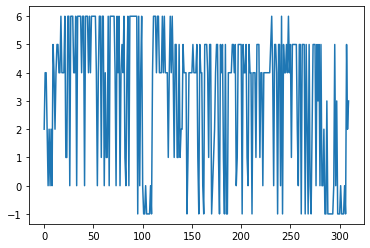

In [129]:
import matplotlib.pyplot as plt

plt.plot(expressions)

In [299]:
import numpy as np
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture('drive/My Drive/darker.mov')
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

results = []
expressions = []
size = 3

frame_counter = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    expressions.append(4)

    if frame is None:
      break

    b_gray, g_gray, r_gray = cv2.split(frame)
    b_gray = SSR(b_gray, size)
    g_gray = SSR(g_gray, size)
    r_gray = SSR(r_gray, size)
    new_frame = cv2.merge([b_gray, g_gray, r_gray])

    gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
   
      
      if shape[0][0] != 0:
        prediction = model.predict([feature_extractor(shape)])
        for i in range(len(prediction)):
          expressions[frame_counter] = np.argmax(prediction[i])

        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0) , 2)
        # show the face number

        if frame_counter < frame_count / 7:
          if np.argmax(prediction[i]) != 0:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)
          
        if frame_count / 7 < frame_counter and frame_counter < frame_count * 2 / 7:
          if np.argmax(prediction[i]) != 1:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 2 / 7 < frame_counter and frame_counter < frame_count * 3 / 7:
          if np.argmax(prediction[i]) != 2:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 3 / 7 < frame_counter and frame_counter < frame_count * 4 / 7:
          if np.argmax(prediction[i]) != 3:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 4 / 7 < frame_counter and frame_counter < frame_count * 5 / 7:
          if np.argmax(prediction[i]) != 4:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 5 / 7 < frame_counter and frame_counter < frame_count * 6 / 7:
          if np.argmax(prediction[i]) != 5:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 6 / 7 < frame_counter and frame_counter < frame_count * 7 / 7:
          if np.argmax(prediction[i]) != 6:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)


        if np.argmax(prediction[i]) == 0:
          cv2.putText(frame, "Afraid", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 1:
          cv2.putText(frame, "Angry", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 2:
          cv2.putText(frame, "Disgusted", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 3:
          cv2.putText(frame, "Happy", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 4:
          cv2.putText(frame, "Neutral", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 5:
          cv2.putText(frame, "Sad", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 6:
          cv2.putText(frame, "Surprised", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)

        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (255, 0, 0) , 2)

        
    results.append(frame)

    frame_counter = frame_counter + 1

cap.release()
cv2.destroyAllWindows()

In [300]:
height, width, layers = results[0].shape
size = (width,height)
out = cv2.VideoWriter('drive/My Drive/darker.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(results)):
    out.write(results[i])

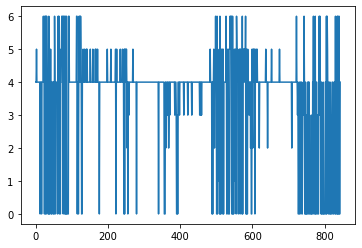

In [301]:
import matplotlib.pyplot as plt

plt.plot(expressions)

In [302]:
import numpy as np
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture('drive/My Drive/brighter.mov')
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

results = []
expressions = []
size = 3

frame_counter = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    expressions.append(4)

    if frame is None:
      break

    b_gray, g_gray, r_gray = cv2.split(frame)
    b_gray = SSR(b_gray, size)
    g_gray = SSR(g_gray, size)
    r_gray = SSR(r_gray, size)
    new_frame = cv2.merge([b_gray, g_gray, r_gray])

    gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
   
      
      if shape[0][0] != 0:
        prediction = model.predict([feature_extractor(shape)])
        for i in range(len(prediction)):
          expressions[frame_counter] = np.argmax(prediction[i])

        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0) , 2)
        # show the face number

        if frame_counter < frame_count / 7:
          if np.argmax(prediction[i]) != 0:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)
          
        if frame_count / 7 < frame_counter and frame_counter < frame_count * 2 / 7:
          if np.argmax(prediction[i]) != 1:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 2 / 7 < frame_counter and frame_counter < frame_count * 3 / 7:
          if np.argmax(prediction[i]) != 2:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 3 / 7 < frame_counter and frame_counter < frame_count * 4 / 7:
          if np.argmax(prediction[i]) != 3:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 4 / 7 < frame_counter and frame_counter < frame_count * 5 / 7:
          if np.argmax(prediction[i]) != 4:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 5 / 7 < frame_counter and frame_counter < frame_count * 6 / 7:
          if np.argmax(prediction[i]) != 5:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)

        if frame_count * 6 / 7 < frame_counter and frame_counter < frame_count * 7 / 7:
          if np.argmax(prediction[i]) != 6:
            color = (0, 0, 255)
          else:
            color = (0, 255, 0)


        if np.argmax(prediction[i]) == 0:
          cv2.putText(frame, "Afraid", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 1:
          cv2.putText(frame, "Angry", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 2:
          cv2.putText(frame, "Disgusted", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 3:
          cv2.putText(frame, "Happy", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 4:
          cv2.putText(frame, "Neutral", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 5:
          cv2.putText(frame, "Sad", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
        if np.argmax(prediction[i]) == 6:
          cv2.putText(frame, "Surprised", (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)

        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (255, 0, 0) , 2)

        
    results.append(frame)

    frame_counter = frame_counter + 1

cap.release()
cv2.destroyAllWindows()

In [303]:
height, width, layers = results[0].shape
size = (width,height)
out = cv2.VideoWriter('drive/My Drive/brighter.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(results)):
    out.write(results[i])

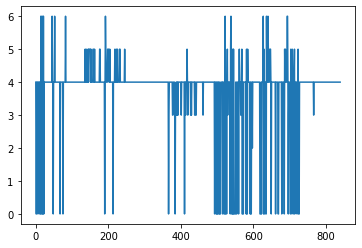

In [304]:
import matplotlib.pyplot as plt

plt.plot(expressions)

In [ ]:
len(results)

1363

In [ ]:
len(expressions)

1364

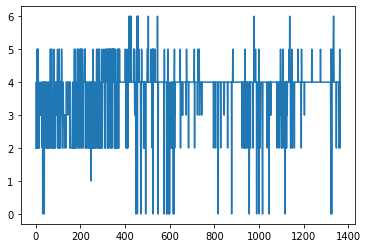

In [ ]:
import matplotlib.pyplot as plt

plt.plot(expressions)

In [ ]:
size = 3

b_gray, g_gray, r_gray = cv2.split(results[10])
b_gray = SSR(b_gray, size)
g_gray = SSR(g_gray, size)
r_gray = SSR(r_gray, size)
processed = cv2.merge([b_gray, g_gray, r_gray])

gray = cv2.cvtColor(processed, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

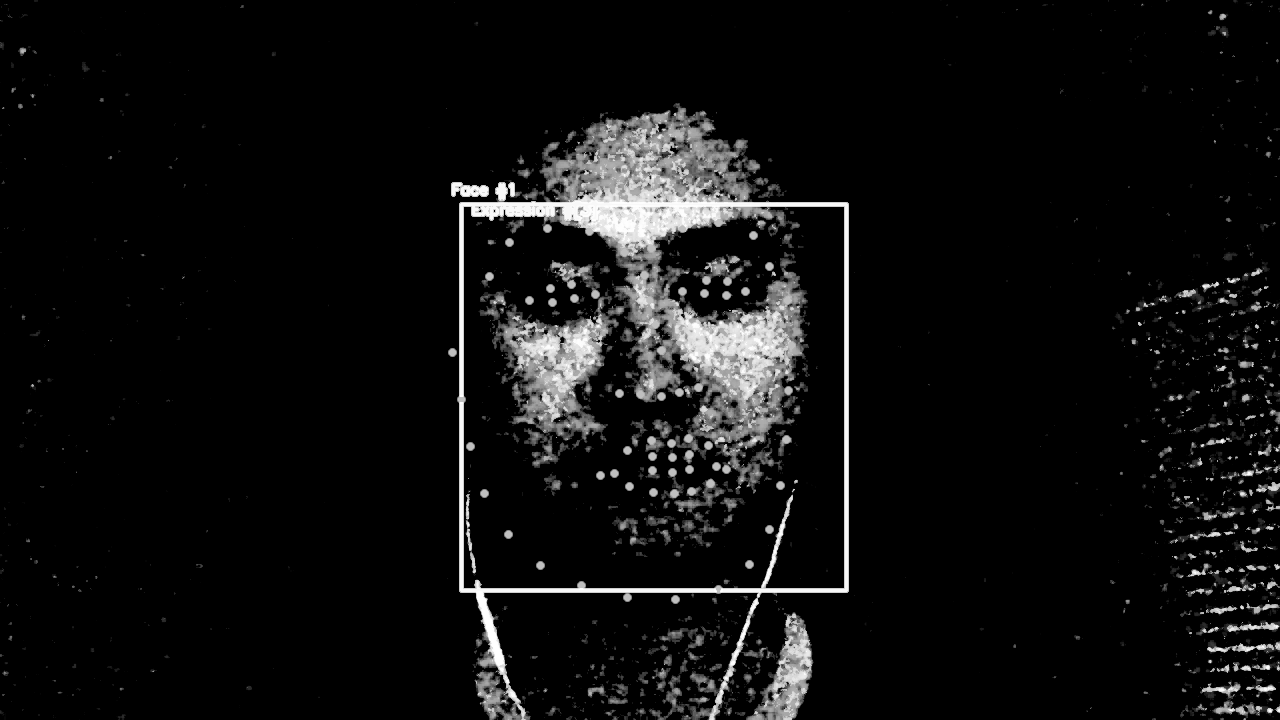

In [ ]:
cv2_imshow(gray)

Scripts

In [ ]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
tf.enable_v2_behavior()

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 2s 4ms/step - loss: 0.3586 - accuracy: 0.9011 - val_loss: 0.1894 - val_accuracy: 0.9441
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1640 - accuracy: 0.9531 - val_loss: 0.1358 - val_accuracy: 0.9592
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9665 - val_loss: 0.1106 - val_accuracy: 0.9673
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9744 - val_loss: 0.0981 - val_accuracy: 0.9707
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9790 - val_loss: 0.0864 - val_accuracy: 0.9742
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9821 - val_loss: 0.0872 - val_accuracy: 0.9741
